In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

plt.style.use('default')

## Import Data Files and Create DataFrames

In [2]:
# Files to load
city_data_to_load = pathlib.Path("resources/city_data.csv")
ride_data_to_load = pathlib.Path("resources/ride_data.csv")

In [3]:
# Read the city and ride data files and store them in a pandas DataFrames
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

print(city_df.head(10))
print(ride_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

## Inspect and Clean the Data (if needed)
### Inspect City DataFrame

In [4]:
# Get the columns and the rows that are not null
city_df.count()
# city_df.isnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the data types of each column
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points for each type of city
city_df.groupby("type")["city"].count()

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

### Inspect Ride DataFrame

In [8]:
# Get the columns and the rows that are not null
ride_df.count()
# ride_df.isnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Get the data types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge the DataFrames

In [10]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Average Fare vs Number of Rides for Each City by City Type
### Create DataFrames

In [11]:
# Create DataFrames for each city type
urban_cities_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_cities_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_cities_df = pyber_df[pyber_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Ride Counts for Each City

In [12]:
# Get ride counts per city for each city type
urban_ride_count = urban_cities_df.groupby("city")["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby("city")["ride_id"].count()
rural_ride_count = rural_cities_df.groupby("city")["ride_id"].count()

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### Average Fare for Each City

In [13]:
# Get average fare per city for each city type
urban_avg_fare = urban_cities_df.groupby("city")["fare"].mean()
suburban_avg_fare = suburban_cities_df.groupby("city")["fare"].mean()
rural_avg_fare = rural_cities_df.groupby("city")["fare"].mean()

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

### Average Number of Drivers for Each City

In [14]:
# Get average number of drivers per city for each city type
urban_driver_count = urban_cities_df.groupby("city")["driver_count"].mean()
suburban_driver_count = suburban_cities_df.groupby("city")["driver_count"].mean()
rural_driver_count = rural_cities_df.groupby("city")["driver_count"].mean()

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Bubble Chart

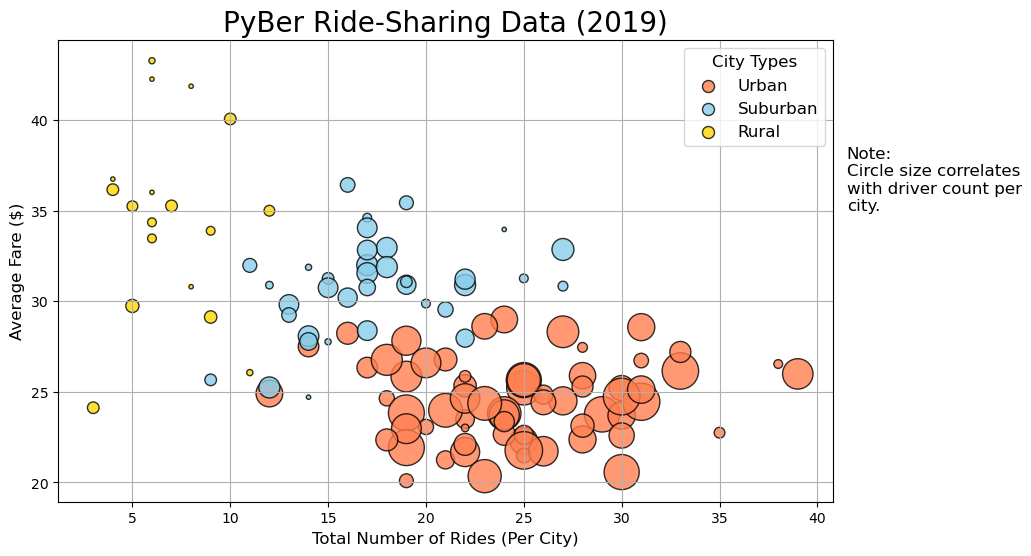

In [15]:
# Build the bubble chart
plt.subplots(figsize=(10, 6))
# Plot urban cities
plt.scatter(x=urban_ride_count,
            y=urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")
# Plot suburban cities
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")
# Plot rural cities
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")
# Add graph properties
plt.title(label="PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel(xlabel="Total Number of Rides (Per City)", fontsize=12)
plt.ylabel(ylabel="Average Fare ($)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize=12,
                  scatterpoints=1,
                  loc="best",
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(41.5, 35, "Note:\nCircle size correlates\nwith driver count per\ncity.", fontsize=12)

# Save the figure.
plt.savefig("analysis/PyBer_Ride-Sharing_Data_2019.png", bbox_inches="tight")
plt.savefig("analysis/PyBer_Ride-Sharing_Data_2019.svg", bbox_inches="tight")
plt.show()